Number of simulations: 10000
Average time per address search: 2.82 minutes
Standard deviation: 2.18 minutes
Median time: 2.36 minutes


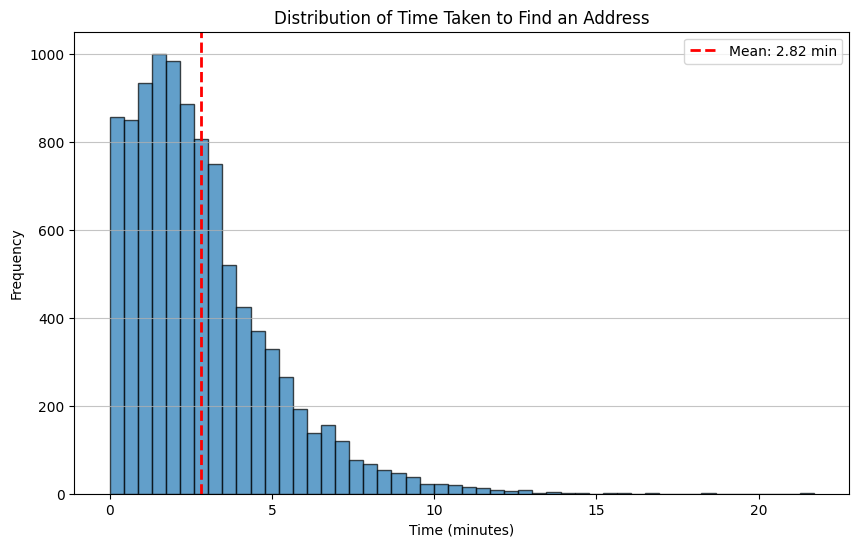

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_address_search(N_internal, M_external, p_internal, p_external, avg_time_internal, avg_time_external, num_simulations):
    """
    Simulates the process of searching for an address across internal and external sources.

    Args:
        N_internal (int): Number of internal data sources.
        M_external (int): Number of external data sources.
        p_internal (float): Probability of finding a valid address in a single internal source.
        p_external (float): Probability of finding a valid address in a single external source.
        avg_time_internal (float): Average time (in minutes) to check an internal source.
        avg_time_external (float): Average time (in minutes) to check an external source.
        num_simulations (int): The number of times to run the simulation.

    Returns:
        numpy.ndarray: An array of the total time taken for each simulation run.
    """
    all_total_times = []

    for _ in range(num_simulations):
        total_time = 0
        found = False

        # Check internal sources
        for i in range(N_internal):
            # Time to check the current internal source
            time_spent = np.random.exponential(scale=avg_time_internal)
            total_time += time_spent

            # Check if a valid address is found
            if np.random.rand() < p_internal:
                found = True
                break  # Stop searching once found

        # If not found, check external sources
        if not found:
            for j in range(M_external):
                # Time to check the current external source
                time_spent = np.random.exponential(scale=avg_time_external)
                total_time += time_spent

                # Check if a valid address is found
                if np.random.rand() < p_external:
                    found = True
                    break

        all_total_times.append(total_time)
        
    return np.array(all_total_times)

# --- Parameters for the Simulation ---
N_internal_sources = 3
M_external_sources = 8
p_internal_success = 0.1
p_external_success = 0.5
avg_time_internal_check = 0.5  # minutes
avg_time_external_check = 1.0  # minutes
number_of_runs = 10000

# --- Run the Simulation ---
total_times = simulate_address_search(
    N_internal_sources,
    M_external_sources,
    p_internal_success,
    p_external_success,
    avg_time_internal_check,
    avg_time_external_check,
    number_of_runs
)

# --- Analyze and Visualize the Results ---

# Print summary statistics
print(f"Number of simulations: {number_of_runs}")
print(f"Average time per address search: {np.mean(total_times):.2f} minutes")
print(f"Standard deviation: {np.std(total_times):.2f} minutes")
print(f"Median time: {np.median(total_times):.2f} minutes")

# Plot a histogram of the results
plt.figure(figsize=(10, 6))
plt.hist(total_times, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Time Taken to Find an Address')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.axvline(np.mean(total_times), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {np.mean(total_times):.2f} min')
plt.legend()
plt.savefig('distribution1.jpg')
plt.show()


A **stochastic process model** is a suitable way to model the time taken to check addresses. This approach recognizes that the time taken for each check is not fixed but is a random variable, which better reflects real-world variability.

### 1. Define the Variables

First, we need to define the variables for each type of data source.

* $T_{internal}$: The random variable representing the time taken to check a single internal data source.
* $T_{external}$: The random variable representing the time taken to check a single external data source.
* $N$: The number of internal data sources (constant).
* $M$: The number of external data sources (constant).
* $X$: The total time taken to find a valid address.

We'll assume that the time taken to check each source is an **independent and identically distributed (i.i.d.) random variable**. This means the time to check one source doesn't affect the time to check another.

***

### 2. Model the Process

The process of checking for an address is sequential. A team member checks a source, and if the address is found and verified, the process stops. Otherwise, they move to the next source.

Let's assume the team member checks internal sources first, followed by external sources.

The total time, $X$, is the sum of the times taken to check each source until the address is found.
$$X = \sum_{i=1}^{k} T_{i}$$
where $k$ is the number of sources checked and $T_i$ is the time taken for the $i$-th source. $k$ is a random variable itself, since the address could be found in the first, second, or any subsequent source.

To make this concrete, we could model the time for each check using a probability distribution. A common choice for time-to-event data is an **exponential distribution** because it has a memoryless property, which is often a reasonable assumption for simple tasks.

Let's say the time to check an internal source, $T_{internal}$, follows an exponential distribution with rate $\lambda_{int}$. The average time to check an internal source is $1/\lambda_{int}$.
Similarly, the time to check an external source, $T_{external}$, follows an exponential distribution with rate $\lambda_{ext}$. The average time to check an external source is $1/\lambda_{ext}$.

Let's also introduce probabilities for success at each source:
* $p_{internal}$: The probability of finding a good address in any single internal source.
* $p_{external}$: The probability of finding a good address in any single external source.

The team member checks internal sources first, one by one. If they fail to find a good address after checking all $N$ internal sources, they move on to the $M$ external sources.

The total time $X$ can be broken down into two components:
1.  **Time spent on internal sources**: The time taken to check internal sources until a good address is found, or all N sources have been checked.
2.  **Time spent on external sources**: The time taken to check external sources, but only if no good address was found in the internal sources.

### 3. Calculating the Expected Total Time

While the total time $X$ is a random variable, we can calculate its **expected value**, $E[X]$, which is the average time a team member would spend on this task.

The expected time is the sum of the expected times for each step, weighted by the probability of reaching that step.
$$E[X] = E[\text{Time checking internal sources}] + E[\text{Time checking external sources}]$$

* **Expected Time for Internal Checks**: This is a geometric-like process. The probability of success at the $k$-th internal source (given failure at the previous $k-1$) is $p_{internal}$. The expected number of internal checks until success is $1/p_{internal}$. Thus, the expected time spent on internal sources is $(1/p_{internal}) \times E[T_{internal}]$. However, this assumes an infinite number of sources. Since we only have $N$ internal sources, we must consider the case where all $N$ are checked and fail.
* A simpler approach is to think in terms of the probability of success at each stage.
    * Probability of success at source 1: $p_{internal}$. Expected time: $p_{internal} \times E[T_{internal}]$.
    * Probability of success at source 2: $(1-p_{internal}) \times p_{internal}$. Expected time: $(1-p_{internal}) \times p_{internal} \times 2 \times E[T_{internal}]$.
    * ... and so on.

Let's simplify and use a more direct approach by considering the states.
* Let $P_{internal\_fail}$ be the probability of not finding an address in all $N$ internal sources. This can be calculated as $(1 - p_{internal})^N$.
* Let $E[T_{internal\_total}]$ be the expected time spent checking internal sources.
* Let $E[T_{external\_total}]$ be the expected time spent checking external sources.

$$E[T_{internal\_total}] = \sum_{i=1}^{N} (1-p_{internal})^{i-1} \times p_{internal} \times i \times E[T_{internal}] + (1-p_{internal})^{N} \times N \times E[T_{internal}]$$
The first part sums the expected time for a successful search at each internal source. The second part is the expected time if all $N$ searches fail. This looks complex, but it can be simplified. A good approximation for the expected number of checks for a geometric process is $1/p$. So, the expected time for internal checks could be roughly approximated as $\frac{1}{p_{internal}} \times E[T_{internal}]$, but only up to $N$ sources.

The expected time spent on external sources is **only incurred if the internal checks fail**.
$$E[T_{external\_total}] = P_{internal\_fail} \times \left( \sum_{j=1}^{M} (1-p_{external})^{j-1} \times p_{external} \times j \times E[T_{external}] + (1-p_{external})^{M} \times M \times E[T_{external}] \right)$$

This model, while mathematically more rigorous than the initial simple cost model, highlights the probabilistic nature of the process and the sources of variability. It's a stepping stone toward more complex models like Markov chains but remains focused on the core random variables of time and success probability.


### How the Code Works

1.  **`simulate_address_search` Function**: This function encapsulates the entire simulation process. It takes all the key parameters as input.
2.  **`numpy.random.exponential`**: This line is the core of the time modeling. It draws a random number from an **exponential distribution**. The `scale` parameter is the average time, which is equivalent to $1/\\lambda$ from our earlier discussion. This accurately models the variability in time for each check.
3.  **`numpy.random.rand`**: This line generates a random number between 0 and 1 to simulate a probabilistic event. If the random number is less than the success probability ($p\_{internal}$ or $p\_{external}$), we consider the check successful.
4.  **Nested Loops**: The code first loops through the internal sources. If a valid address is found (`found = True`), the inner loop breaks, and the external sources are not checked. If the internal loop completes without a success, the outer loop for external sources begins.
5.  **Data Collection**: The total time for each simulation run is appended to the `all_total_times` list.
6.  **Analysis and Visualization**: After all simulations are complete, we use `numpy` to calculate summary statistics (mean, standard deviation, median) of the `total_times` array.
7.  **`matplotlib.pyplot`**: The histogram visualizes the **distribution** of the total time. This is a key advantage of simulation over a purely mathematical model. It shows you not just the average time, but the range of possible outcomes and how likely each outcome is. You'll see that some searches are very quick, while a few take a long time, leading to a long tail in the distribution.